# LinearRegression

> class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# Parameters:

**fit_intercept** : bool, default=True -> y 절편 편향(bias) , 굳이 없애지 않음

Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**copy_X** : bool, default=True

If True, X will be copied; else, it may be overwritten.

**n_jobs** : int, default=None

The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly  `n_targets  >  1`  and secondly  `X`  is sparse or if  `positive`  is set to  `True`.  `None`  means 1 unless in a  [`joblib.parallel_backend`](https://joblib.readthedocs.io/en/latest/parallel.html#joblib.parallel_backend "(in joblib v1.3.0.dev0)")  context.  `-1`  means using all processors. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-n_jobs)  for more details.

**positive** : bool, default=False

When set to  `True`, forces the coefficients to be positive. This option is only supported for dense arrays.


# Attributes:

**coef_** : array of shape (n_features, ) or (n_targets, n_features)

Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

**rank_** : int

Rank of matrix  `X`. Only available when  `X`  is dense.

**singular_** : array of shape (min(X, y),)

Singular values of  `X`. Only available when  `X`  is dense.

**intercept_** : float or array of shape (n_targets,)

Independent term in the linear model. Set to 0.0 if  `fit_intercept  =  False`.

**n_features_in_** : int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).


**feature_names_in_** : ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Example  I
- 키 & 몸무게

In [4]:
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

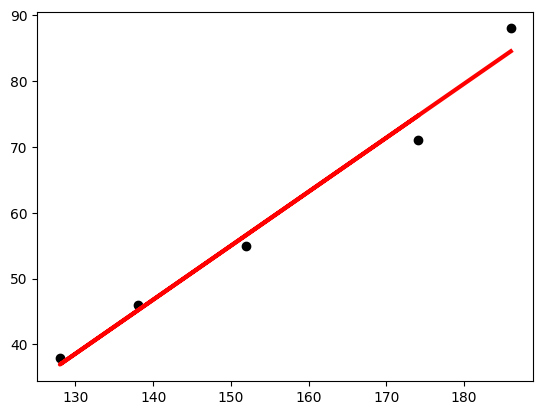

In [6]:
# 학습
reg.fit(X,y)

# 시각화 - 실제치 -> scatter plot
plt.scatter(X, y, color = 'black')

# 학습 데이터를 입력으로 하여 예측값을 계산
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 line graph
    # 계산된 기울기 & y절편 직선
plt.plot(X, y_pred, color = 'red', linewidth=3)

plt.show()

### Example II 
- 당뇨병 in sklearn library

In [7]:
from sklearn import datasets 

# 당뇨병 데이터세트 적재 
diabetes = datasets.load_diabetes()

# train & test dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size= 0.2, random_state=0)

# linear regression model 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

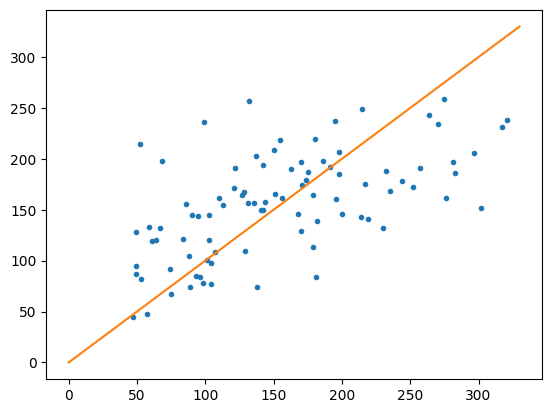

In [10]:
# test data로 예측
y_pred = model.predict(X_test)

# 실제치와 예측치 비교 on scatter plot
plt.plot(y_test, y_pred, '.')

# 직선 그리기 위한 완벽한 선형 데이터 생성
x = np.linspace(0, 330, 100)
y = x
plt.plot(x,y)
plt.show()

In [12]:
# 다중공선성 Check 

In [13]:
import seaborn as sns

In [14]:
import pandas as pd

In [28]:
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


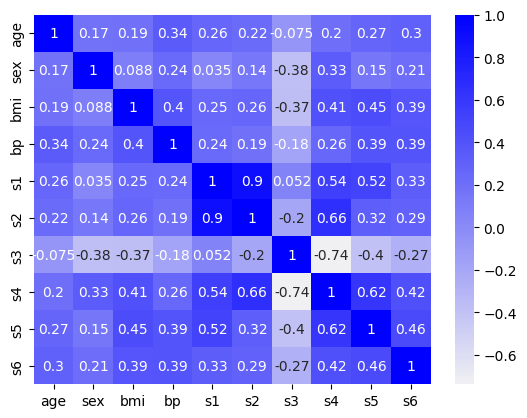

In [19]:
df_diabetes=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df_diabetes.corr()
cmap = sns.light_palette("blue", as_cmap=True)
sns.heatmap(df_diabetes.corr(), annot=True, cmap=cmap)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 3424.259 RMSE : 58.517
Variance score : 0.332


### Multi-collinearity

1. 유무 먼저 확인 
    - VIF <- statsmodels 라이브러리 

2. 비교 
    - Just 'Linear Regression'
    - corr() 확인하여, 제거 후 'Linear Regression'
    - standard scaling 후 'Heatmap'
    > 각각 MSE 로 성능 평가

In [21]:
# VIF - 다중공선성 유무 EDA

!pip install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
      

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [24]:
_vif = pd.DataFrame()

In [31]:
_vif['VIF factor'] = [vif(df_diabetes.values, i) for i in range(df_diabetes.shape[1])]
_vif['features'] = diabetes.feature_names

In [32]:
_vif

,VIF factor,features
0,1.217307,age
1,1.278071,sex
2,1.509437,bmi
3,1.459428,bp
4,59.202510,s1
5,39.193370,s2
6,15.402156,s3
7,8.890986,s4
8,10.075967,s5
9,1.484623,s6


In [33]:
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [38]:
df_diabetes1 = df_diabetes.drop('s1', axis = 1)


In [44]:
df_diabetes2 = df_diabetes1.drop('s2', axis = 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes1, diabetes.target, test_size= 0.2, random_state=0)

# linear regression model 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# MSE 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 3468.959 RMSE : 58.898
Variance score : 0.324


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes2, diabetes.target, test_size= 0.2, random_state=0)

# linear regression model 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 3435.117 RMSE : 58.610
Variance score : 0.330


In [47]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_diabetes)
df_diabete =scaler.transform(df_diabetes)

y_target=diabetes.target
X_data=df_diabete
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.2, random_state=0)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 3424.259, RMSE:58.517
Variance score:0.332
